# Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import ipywidgets as widgets
from xgboost import XGBClassifier


from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')



# Carregando DataFrame e Explorando os Dados

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
colunas = [
"SK_ID_CURR",
"TARGET",
"NAME_CONTRACT_TYPE",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_GOODS_PRICE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"DAYS_BIRTH",
"DAYS_ID_PUBLISH",
"REGION_RATING_CLIENT_W_CITY",
"REG_REGION_NOT_LIVE_REGION",
"EXT_SOURCE_2",
]

In [4]:
df_sel = df[colunas]

## EDA

In [5]:
df_sel.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2
0,456162,0,Cash loans,N,N,0,112500.0,700830.0,585000.0,Working,Incomplete higher,Single / not married,House / apartment,-8676,-1363,2,0,0.699373
1,134978,0,Cash loans,N,N,0,90000.0,375322.5,324000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13583,-3287,2,0,0.199651
2,318952,0,Cash loans,Y,N,0,180000.0,544491.0,454500.0,Working,Secondary / secondary special,Married,House / apartment,-13993,-4175,2,0,0.704880
3,361264,0,Cash loans,N,Y,0,270000.0,814041.0,679500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22425,-1732,1,0,0.724576
4,260639,0,Cash loans,N,Y,0,144000.0,675000.0,675000.0,Working,Secondary / secondary special,Separated,House / apartment,-18839,-2381,2,0,0.706310


In [6]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   246008 non-null  int64  
 1   TARGET                       246008 non-null  int64  
 2   NAME_CONTRACT_TYPE           246008 non-null  object 
 3   FLAG_OWN_CAR                 246008 non-null  object 
 4   FLAG_OWN_REALTY              246008 non-null  object 
 5   CNT_CHILDREN                 246008 non-null  int64  
 6   AMT_INCOME_TOTAL             246008 non-null  float64
 7   AMT_CREDIT                   246008 non-null  float64
 8   AMT_GOODS_PRICE              245782 non-null  float64
 9   NAME_INCOME_TYPE             246008 non-null  object 
 10  NAME_EDUCATION_TYPE          246008 non-null  object 
 11  NAME_FAMILY_STATUS           246008 non-null  object 
 12  NAME_HOUSING_TYPE            246008 non-null  object 
 13 

In [7]:
df_sel.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2
count,246008.000000,246008.000000,246008.000000,2.460080e+05,2.460080e+05,2.457820e+05,246008.000000,246008.000000,246008.000000,246008.000000,2.454640e+05
mean,278280.072908,0.081176,0.415527,1.689122e+05,5.996283e+05,5.389289e+05,-16042.794393,-2991.647642,2.031206,0.015186,5.143916e-01
std,102790.909988,0.273106,0.719922,2.603818e+05,4.030672e+05,3.699738e+05,4365.973763,1510.020637,0.502715,0.122294,1.908912e-01
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,-25229.000000,-7197.000000,1.000000,0.000000,8.173617e-08
25%,189165.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-19691.000000,-4297.250000,2.000000,0.000000,3.926530e-01
50%,278392.500000,0.000000,0.000000,1.485000e+05,5.147775e+05,4.500000e+05,-15763.000000,-3250.000000,2.000000,0.000000,5.657089e-01
75%,367272.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-12418.000000,-1715.000000,2.000000,0.000000,6.634999e-01
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,-7489.000000,0.000000,3.000000,1.000000,8.549997e-01


In [8]:
for cada in list(df_sel.columns):
    print(cada)
    print(f'{df[cada].value_counts()}\n\n')
   

SK_ID_CURR
456162    1
277529    1
110111    1
298721    1
449263    1
         ..
264039    1
158685    1
270364    1
322580    1
454197    1
Name: SK_ID_CURR, Length: 246008, dtype: int64


TARGET
0    226038
1     19970
Name: TARGET, dtype: int64


NAME_CONTRACT_TYPE
Cash loans         222622
Revolving loans     23386
Name: NAME_CONTRACT_TYPE, dtype: int64


FLAG_OWN_CAR
N    162355
Y     83653
Name: FLAG_OWN_CAR, dtype: int64


FLAG_OWN_REALTY
Y    170535
N     75473
Name: FLAG_OWN_REALTY, dtype: int64


CNT_CHILDREN
0     172485
1      48793
2      21376
3       2929
4        330
5         66
6         15
7          4
8          2
12         2
10         2
19         2
11         1
14         1
Name: CNT_CHILDREN, dtype: int64


AMT_INCOME_TOTAL
135000.0    28598
112500.0    24908
157500.0    21265
180000.0    19776
90000.0     17874
            ...  
73647.0         1
117513.0        1
151929.0        1
45675.0         1
194670.0        1
Name: AMT_INCOME_TOTAL, Length: 2150, dty

In [9]:
features_num = df_sel.select_dtypes(include=np.number).columns.tolist()
features_num.remove("TARGET")
features_num.remove("SK_ID_CURR")
features_num

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'EXT_SOURCE_2']

In [10]:
features_cat = df_sel.select_dtypes(exclude=np.number).columns.tolist()
features_cat.append(features_num.pop(6))
features_cat.append(features_num.pop(6))

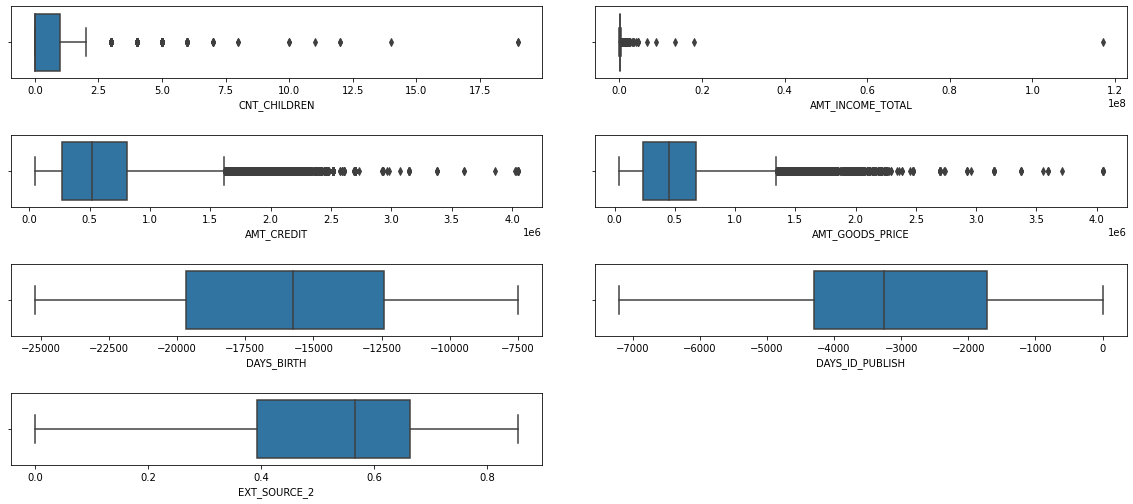

In [11]:
plt.figure(figsize=(20, 12))
for coluna, position in zip(features_num, range(1,10)):
  plt.subplot(5, 2, position)
  sns.boxplot(data = df_sel, x = coluna)
plt.subplots_adjust(bottom=0.2,                    
                    wspace=0.1,
                    hspace=0.8)
plt.show()

In [12]:
features_cat_target = features_cat.copy()
features_cat_target.append('TARGET')

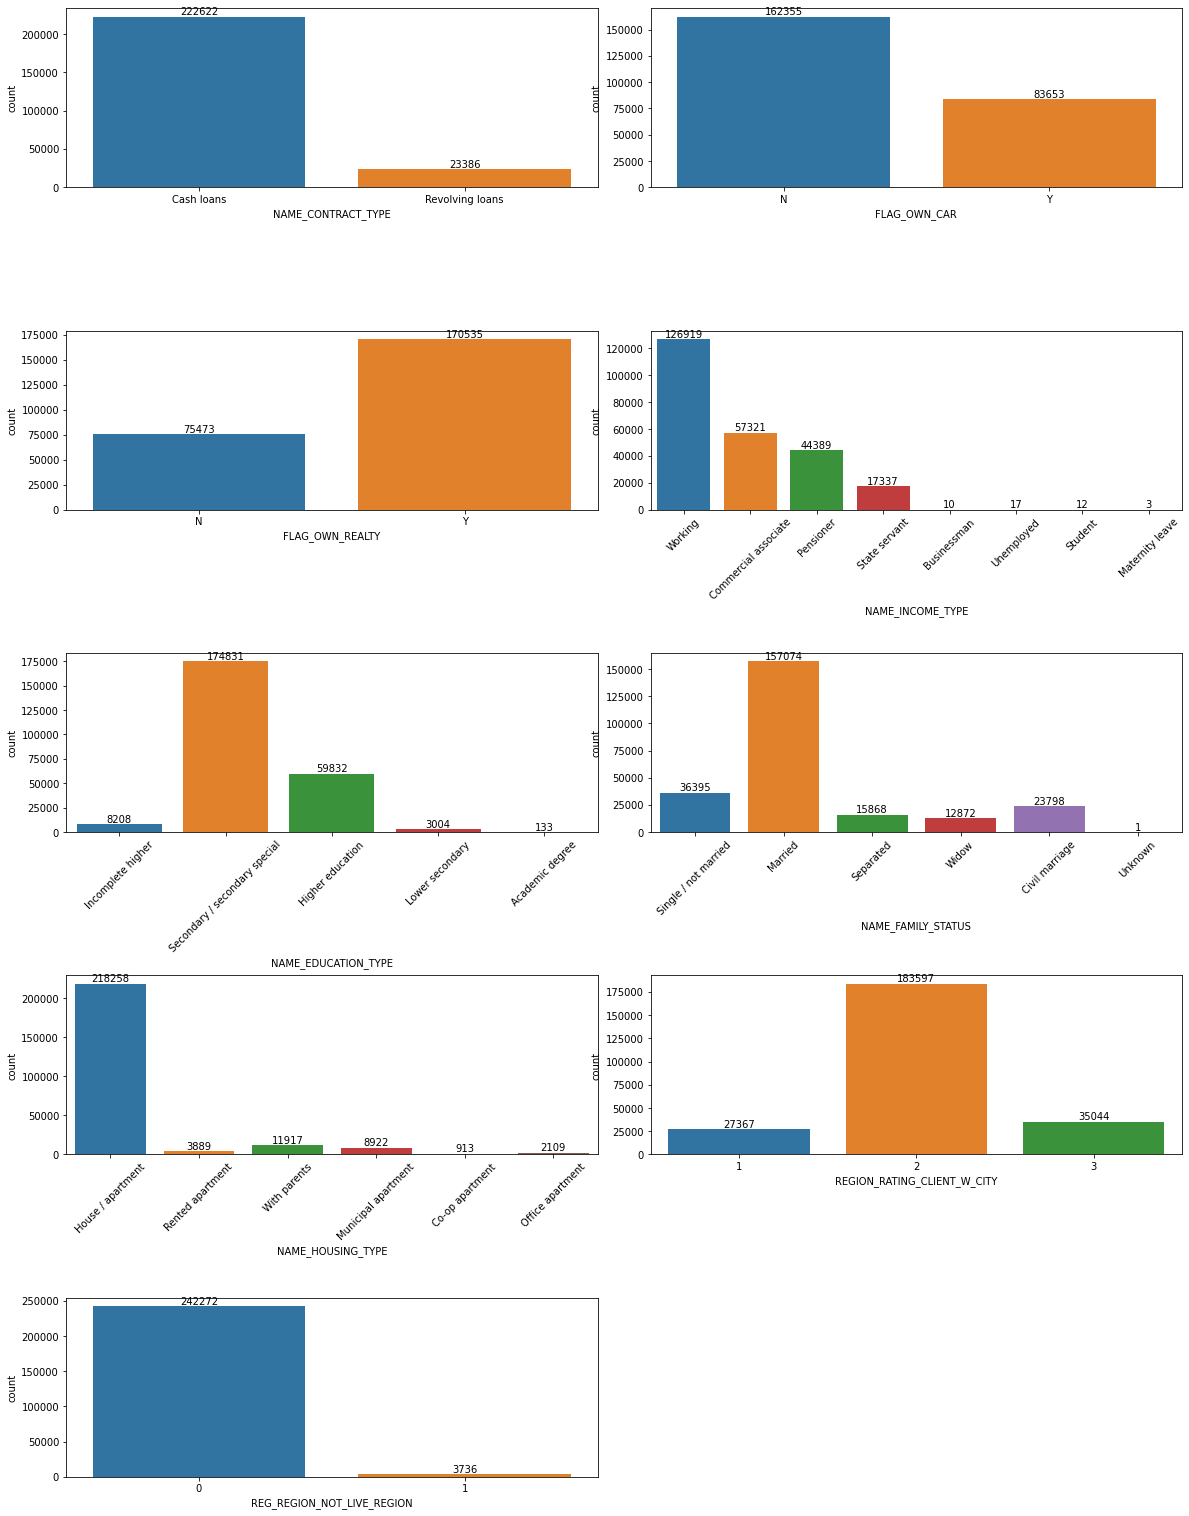

In [13]:
plt.figure(figsize=(20,30))
for coluna, position in zip(features_cat_target, range(1,10)):
  plt.subplot(5, 2, position)
  ax = sns.countplot(data = df_sel, x = coluna)
  ax.bar_label(ax.containers[0])
  if df_sel[coluna].nunique() < 5:
    plt.xticks(fontsize=10, rotation=0)
  else:
    plt.xticks(fontsize=10, rotation=45)
  
plt.subplots_adjust(bottom=0.2,                    
                    wspace=0.1,
                    hspace=0.8)
  
plt.show()

# Limpeza preliminar

In [14]:
linha_a_dropar = df_sel[df_sel['AMT_INCOME_TOTAL'] > 30000000]
df_sel.drop([linha_a_dropar.index[0]], inplace = True)

In [15]:
df_sel['NAME_INCOME_TYPE'].replace(['Unemployed', 'Student', 'Businessman', 'Maternity leave'],np.NaN, inplace = True)
df_sel.dropna(subset=['NAME_INCOME_TYPE'], inplace = True)
df_sel['NAME_INCOME_TYPE'].value_counts()

Working                 126918
Commercial associate     57321
Pensioner                44389
State servant            17337
Name: NAME_INCOME_TYPE, dtype: int64

In [16]:
df_sel['NAME_FAMILY_STATUS'].replace('Unknown',np.NaN, inplace = True)
df_sel.dropna(subset=['NAME_FAMILY_STATUS'], inplace = True)
df_sel['NAME_FAMILY_STATUS'].value_counts()

Married                 157048
Single / not married     36387
Civil marriage           23792
Separated                15867
Widow                    12870
Name: NAME_FAMILY_STATUS, dtype: int64

In [17]:
df_sel.dropna(inplace = True)

# Separando e balanceando os dados

In [18]:
X = df_sel.drop(columns = ['TARGET'], axis = 1)
y = df_sel['TARGET']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify = y)

In [20]:
def downsampling(df, target, rs=0):
    maj_value = df[target].value_counts().sort_values().index[1]
    min_value = df[target].value_counts().sort_values().index[0]

    df_maj = df[df[target]==maj_value]
    df_min = df[df[target]==min_value]
    df_majority_downsampled = resample(df_maj, 
                                    replace=False,    # amostragem sem reposição
                                    n_samples= df_min.shape[0],     # número da amostra igual a quantidade da classe com menos observações 
                                    random_state=rs) # random state
    return pd.concat([df_majority_downsampled, df_min])
   

In [21]:
df_train_balanced = downsampling(pd.concat([X_train, y_train], axis=1), 'TARGET')
X_balanced = df_train_balanced.drop(columns = ['TARGET'], axis = 1)
y_balanced = df_train_balanced['TARGET']


# Pipeline, treino e resultados dos modelos

In [22]:
def model_type(modelo:str):
    model = {'Logit': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'DecisionTreeGini': DecisionTreeClassifier(), 'DecisionTreeEntropy': DecisionTreeClassifier(criterion = 'entropy'), 'RandomForest': RandomForestClassifier(), 'XGboost': XGBClassifier()}

    pipe_tr_features_num = Pipeline([
    ('tr_standard', StandardScaler())
    ])

    pipe_tr_features_cat = Pipeline([
    ('tr_dummy', OneHotEncoder(drop='first')),
    ])

    pre_processor = ColumnTransformer([
        ('tr_num', pipe_tr_features_num, features_num),
        ('tr_cat', pipe_tr_features_cat, features_cat)
    ])

    pipe_final = Pipeline([
        ('pre_processor', pre_processor),
        ('est', model[modelo])
    ])
    return pipe_final


In [23]:
def resultados(modelo, nome):
    proba = modelo.predict_proba(X_test)[:,1]
    predict_treino = modelo.predict(X_balanced)
    predict_teste = modelo.predict(X_test)
    
    roc_treino = roc_auc_score(y_balanced, predict_treino)
    roc_teste = roc_auc_score(y_test, predict_teste)
    
    scores = {  'modelo': f'{nome}',
                'roc_auc': roc_auc_score(y_test, predict_teste),
                'f1_score_1': f1_score(y_test, predict_teste),
                'precision_1': precision_score(y_test, predict_teste),
                'recall_1': recall_score(y_test, predict_teste),
                'f1_score_0': f1_score(y_test, predict_teste, pos_label=0),
                'precision_0': precision_score(y_test, predict_teste, pos_label=0),
                'recall_0': recall_score(y_test, predict_teste, pos_label=0)
                }

    print(f'O roc auc score (treino) do modelo {nome} foi: {roc_treino:.2f}')
    print(f'O roc auc score (teste) do modelo {nome} foi: {roc_teste:.2f}\n')
    print(classification_report(y_test, predict_teste))
    ConfusionMatrixDisplay.from_predictions(y_test, predict_teste, normalize = 'all')
    
    return proba, predict_treino, predict_teste, roc_treino, roc_teste, scores

In [24]:
def y_pred_cutoff (cutoff, proba):
    y_pred = np.where(proba>=cutoff,1,0)
    return y_pred

In [25]:
resultados_modelos = []

# Logit

In [26]:
pipe_logit = model_type('Logit')

In [27]:
pipe_logit.fit(X_balanced, y_balanced)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_standard',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_ID_PUBLISH',
                                                   'EXT_SOURCE_2']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_dummy',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'REGION_RATING_CLIENT_W_CITY',
                                                   'REG_REGION_NOT_LIVE_REGION'])])),
                ('est', LogisticRegression())])

O roc auc score (treino) do modelo Logit foi: 0.64
O roc auc score (teste) do modelo Logit foi: 0.63

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     45060
           1       0.13      0.61      0.22      3980

    accuracy                           0.65     49040
   macro avg       0.54      0.63      0.50     49040
weighted avg       0.88      0.65      0.73     49040



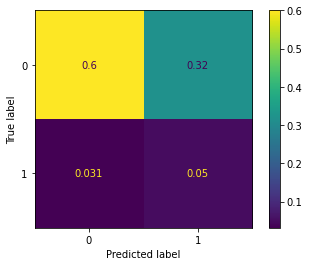

In [28]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_logit = resultados(pipe_logit, 'Logit')
resultados_modelos.append(scores_logit)

In [29]:
# global

def precision_recall_widgets(cutoff = 0.5):
    
    y_pred = np.where(proba >= cutoff, 1, 0)
    y_pred
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    df = pd.DataFrame(report).round(2)
    
    plt.figure(figsize=(10,5))
    plt.table(cellText=df.values, colLabels=df.columns, loc='center')

widgets.interact(precision_recall_widgets, cutoff=(0.1, 0.9, 0.01))

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=0.9, min=0.1, step=0.01), Output()), _d…

<function __main__.precision_recall_widgets(cutoff=0.5)>

# KNN

### KNN - Random Search

In [30]:
def random_search_knn (pipe_final, min, max, n_iter, scoring = 'roc_auc', cv = 5):
    
    espaco_hiperparametros= {
        'est__n_neighbors': list(range(min,max)),
    }
    random_search = RandomizedSearchCV(pipe_final, 
                                    param_distributions=espaco_hiperparametros, 
                                    scoring=scoring, cv=cv, verbose=2, n_iter=n_iter, n_jobs = 6)
    return random_search

In [31]:

def grid_search_knn (pipe_final, min, max, scoring = 'roc_auc', cv = 5):
    espaco_hiperparametros= {
        'est__n_neighbors': list(range(min,max)),
    }
    grid_search = GridSearchCV(pipe_final, param_grid=espaco_hiperparametros, scoring=scoring, cv=cv, verbose=2)
    return grid_search

In [32]:
pipe_knn = model_type('KNN')

In [33]:
scoring = 'roc_auc'

In [34]:
random_knn = random_search_knn(pipe_knn,280,310,10,scoring = scoring)

In [35]:
random_knn.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_standard',
                                                                                                StandardScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT',
                                                                                'AMT_GOODS_PRICE',
                                                                                'DAYS_BIRTH',
                                                                                'DAYS_ID_PUBLISH',
                                                                                'EXT_SOURCE_2']),
                                                                              ('tr_cat',
                                                                               Pipeline(steps=[('tr_dummy',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['NAME_...
                                                                                'NAME_EDUCATION_TYPE',
                                                                                'NAME_FAMILY_STATUS',
                                                                                'NAME_HOUSING_TYPE',
                                                                                'REGION_RATING_CLIENT_W_CITY',
                                                                                'REG_REGION_NOT_LIVE_REGION'])])),
                                             ('est', KNeighborsClassifier())]),
                   n_jobs=6,
                   param_distributions={'est__n_neighbors': [280, 281, 282, 283,
                                                             284, 285, 286, 287,
                                                             288, 289, 290, 291,
                                                             292, 293, 294, 295,
                                                             296, 297, 298, 299,
                                                             300, 301, 302, 303,
                                                             304, 305, 306, 307,
                                                             308, 309]},
                   scoring='roc_auc', verbose=2)

In [36]:
df_result = pd.DataFrame(random_knn.cv_results_)
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.143297,0.001738,3.685832,0.032194,283,{'est__n_neighbors': 283},0.687321,0.678689,0.681110,0.691296,0.688016,0.685286,0.004662,9
1,0.119269,0.013485,3.662700,0.047347,288,{'est__n_neighbors': 288},0.687197,0.678560,0.681105,0.691821,0.688328,0.685402,0.004864,4
2,0.154294,0.006472,3.396647,0.157771,282,{'est__n_neighbors': 282},0.687264,0.678743,0.680962,0.691212,0.688071,0.685250,0.004654,10
3,0.155224,0.009036,3.322165,0.028421,304,{'est__n_neighbors': 304},0.686755,0.679041,0.681482,0.691803,0.688783,0.685573,0.004689,1
4,0.158333,0.006978,3.279287,0.081074,286,{'est__n_neighbors': 286},0.687372,0.678508,0.680993,0.691718,0.688205,0.685359,0.004870,7


In [37]:
random_knn.best_params_

{'est__n_neighbors': 304}

O roc auc score (treino) do modelo KNN classifier (Random Search) foi: 0.64
O roc auc score (teste) do modelo KNN classifier (Random Search) foi: 0.63

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     45060
           1       0.13      0.62      0.22      3980

    accuracy                           0.64     49040
   macro avg       0.54      0.63      0.49     49040
weighted avg       0.88      0.64      0.72     49040



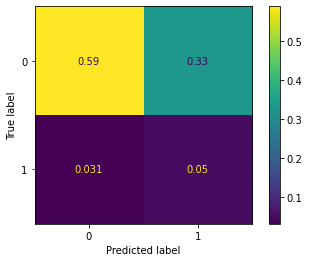

In [38]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_random_knn = resultados(random_knn.best_estimator_, 'KNN classifier (Random Search)')
resultados_modelos.append(scores_random_knn)

### KNN - Grid Search

In [39]:
metrica = 'roc_auc'
grid_knn = grid_search_knn(pipe_knn, 296, 301, cv = 5)

In [40]:
grid_knn.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...............................est__n_neighbors=296; total time=   1.4s
[CV] END ...............................est__n_neighbors=296; total time=   1.6s
[CV] END ...............................est__n_neighbors=296; total time=   1.6s
[CV] END ...............................est__n_neighbors=296; total time=   1.6s
[CV] END ...............................est__n_neighbors=296; total time=   1.6s
[CV] END ...............................est__n_neighbors=297; total time=   1.6s
[CV] END ...............................est__n_neighbors=297; total time=   1.4s
[CV] END ...............................est__n_neighbors=297; total time=   1.4s
[CV] END ...............................est__n_neighbors=297; total time=   1.4s
[CV] END ...............................est__n_neighbors=297; total time=   1.5s
[CV] END ...............................est__n_neighbors=298; total time=   1.5s
[CV] END ...............................est__n_ne

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('tr_num',
                                                                         Pipeline(steps=[('tr_standard',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'EXT_SOURCE_2']),
                                                                        ('tr_cat',
                                                                         Pipeline(steps=[('tr_dummy',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE',
                                                                          'REGION_RATING_CLIENT_W_CITY',
                                                                          'REG_REGION_NOT_LIVE_REGION'])])),
                                       ('est', KNeighborsClassifier())]),
             param_grid={'est__n_neighbors': [296, 297, 298, 299, 300]},
             scoring='roc_auc', verbose=2)

In [41]:
df_result = pd.DataFrame(random_knn.cv_results_)
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.143297,0.001738,3.685832,0.032194,283,{'est__n_neighbors': 283},0.687321,0.678689,0.681110,0.691296,0.688016,0.685286,0.004662,9
1,0.119269,0.013485,3.662700,0.047347,288,{'est__n_neighbors': 288},0.687197,0.678560,0.681105,0.691821,0.688328,0.685402,0.004864,4
2,0.154294,0.006472,3.396647,0.157771,282,{'est__n_neighbors': 282},0.687264,0.678743,0.680962,0.691212,0.688071,0.685250,0.004654,10
3,0.155224,0.009036,3.322165,0.028421,304,{'est__n_neighbors': 304},0.686755,0.679041,0.681482,0.691803,0.688783,0.685573,0.004689,1
4,0.158333,0.006978,3.279287,0.081074,286,{'est__n_neighbors': 286},0.687372,0.678508,0.680993,0.691718,0.688205,0.685359,0.004870,7


In [42]:
grid_knn.best_params_

{'est__n_neighbors': 298}

O roc auc score (treino) do modelo KNN classifier (Grid Search) foi: 0.64
O roc auc score (teste) do modelo KNN classifier (Grid Search) foi: 0.63

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     45060
           1       0.13      0.61      0.22      3980

    accuracy                           0.64     49040
   macro avg       0.54      0.63      0.49     49040
weighted avg       0.88      0.64      0.72     49040



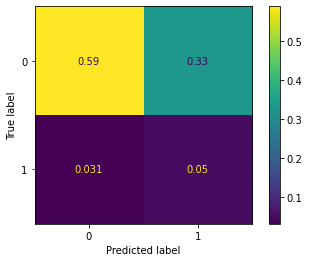

In [43]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_grid_knn = resultados(grid_knn.best_estimator_, 'KNN classifier (Grid Search)')
resultados_modelos.append(scores_grid_knn)


# Decision Tree

## Decision Tree Gini

In [44]:
pipe_decision_tree_gini = model_type('DecisionTreeGini')

In [45]:
pipe_decision_tree_gini.fit(X_balanced, y_balanced)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_standard',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_ID_PUBLISH',
                                                   'EXT_SOURCE_2']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_dummy',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'REGION_RATING_CLIENT_W_CITY',
                                                   'REG_REGION_NOT_LIVE_REGION'])])),
                ('est', DecisionTreeClassifier())])

O roc auc score (treino) do modelo Decision Tree Gini foi: 1.00
O roc auc score (teste) do modelo Decision Tree Gini foi: 0.56

              precision    recall  f1-score   support

           0       0.93      0.55      0.70     45060
           1       0.10      0.56      0.17      3980

    accuracy                           0.55     49040
   macro avg       0.52      0.56      0.43     49040
weighted avg       0.87      0.55      0.65     49040



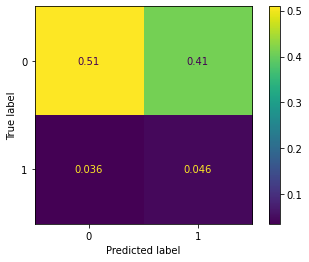

In [46]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_tree_gini = resultados(pipe_decision_tree_gini, 'Decision Tree Gini')
resultados_modelos.append(scores_tree_gini)

## Decision Tree Entropia

In [47]:
pipe_decision_tree_entropy = model_type('DecisionTreeEntropy')

In [48]:
pipe_decision_tree_entropy.fit(X_balanced, y_balanced)

Pipeline(steps=[('pre_processor',
                 ColumnTransformer(transformers=[('tr_num',
                                                  Pipeline(steps=[('tr_standard',
                                                                   StandardScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT',
                                                   'AMT_GOODS_PRICE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_ID_PUBLISH',
                                                   'EXT_SOURCE_2']),
                                                 ('tr_cat',
                                                  Pipeline(steps=[('tr_dummy',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'FLAG_OWN_CAR',
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'REGION_RATING_CLIENT_W_CITY',
                                                   'REG_REGION_NOT_LIVE_REGION'])])),
                ('est', DecisionTreeClassifier(criterion='entropy'))])

O roc auc score (treino) do modelo Decision Tree Entropy foi: 1.00
O roc auc score (teste) do modelo Decision Tree Entropy foi: 0.55

              precision    recall  f1-score   support

           0       0.93      0.55      0.69     45060
           1       0.10      0.56      0.17      3980

    accuracy                           0.55     49040
   macro avg       0.52      0.55      0.43     49040
weighted avg       0.87      0.55      0.65     49040



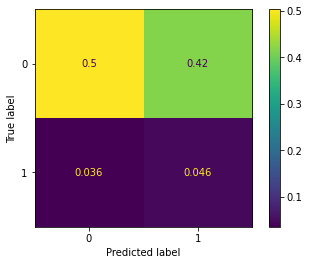

In [49]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_tree_entr = resultados(pipe_decision_tree_entropy, 'Decision Tree Entropy')
resultados_modelos.append(scores_tree_entr)

# Random Forest

## Random Forest - Random Search

In [50]:
pipe_r_forest = model_type('RandomForest')

In [51]:
scoring = 'roc_auc'

In [52]:
def random_search_r_forest (pipe_final, min_e, max_e, min_d, max_d, n_iter, scoring = 'roc_auc', cv = 5):
    
    espaco_hiperparametros= {
        'est__n_estimators': range(min_e, max_e),
        'est__max_depth': range(min_d, max_d)
    } 
    random_search = RandomizedSearchCV(pipe_final, 
                                    param_distributions=espaco_hiperparametros, 
                                    scoring=scoring, cv=cv, verbose=2, n_iter=n_iter, n_jobs = 5)
    return random_search

In [53]:
random_r_forest = random_search_r_forest(pipe_r_forest,290,350,0,20,5,scoring = scoring, cv = 5)

In [54]:
random_r_forest.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_standard',
                                                                                                StandardScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT',
                                                                                'AMT_GOODS_PRICE',
                                                                                'DAYS_BIRTH',
                                                                                'DAYS_ID_PUBLISH',
                                                                                'EXT_SOURCE_2']),
                                                                              ('tr_cat',
                                                                               Pipeline(steps=[('tr_dummy',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['NAME_...PE',
                                                                                'FLAG_OWN_CAR',
                                                                                'FLAG_OWN_REALTY',
                                                                                'NAME_INCOME_TYPE',
                                                                                'NAME_EDUCATION_TYPE',
                                                                                'NAME_FAMILY_STATUS',
                                                                                'NAME_HOUSING_TYPE',
                                                                                'REGION_RATING_CLIENT_W_CITY',
                                                                                'REG_REGION_NOT_LIVE_REGION'])])),
                                             ('est',
                                              RandomForestClassifier())]),
                   n_iter=5, n_jobs=5,
                   param_distributions={'est__max_depth': range(0, 20),
                                        'est__n_estimators': range(290, 350)},
                   scoring='roc_auc', verbose=2)

In [55]:
df_result_r_forest = pd.DataFrame(random_r_forest.cv_results_)
df_result_r_forest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_estimators,param_est__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.018700,0.100710,0.311224,0.009872,297,5,"{'est__n_estimators': 297, 'est__max_depth': 5}",0.692708,0.680365,0.685691,0.692884,0.690883,0.688506,0.004830,3
1,4.478051,0.100426,0.270525,0.013810,301,2,"{'est__n_estimators': 301, 'est__max_depth': 2}",0.683282,0.668391,0.673113,0.679393,0.677426,0.676321,0.005144,4
2,0.299997,0.010854,0.000000,0.000000,346,0,"{'est__n_estimators': 346, 'est__max_depth': 0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,8.611083,0.071202,0.333343,0.013041,304,6,"{'est__n_estimators': 304, 'est__max_depth': 6}",0.695866,0.683180,0.689033,0.697174,0.693051,0.691661,0.005076,1
4,9.050906,0.103649,0.302215,0.041200,309,6,"{'est__n_estimators': 309, 'est__max_depth': 6}",0.693981,0.683090,0.688414,0.697078,0.692432,0.690999,0.004840,2


In [56]:
random_r_forest.best_params_

{'est__n_estimators': 304, 'est__max_depth': 6}

O roc auc score (treino) do modelo Random Forest (Random Search) foi: 0.65
O roc auc score (teste) do modelo Random Forest (Random Search) foi: 0.63

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     45060
           1       0.13      0.62      0.22      3980

    accuracy                           0.64     49040
   macro avg       0.54      0.63      0.49     49040
weighted avg       0.88      0.64      0.72     49040



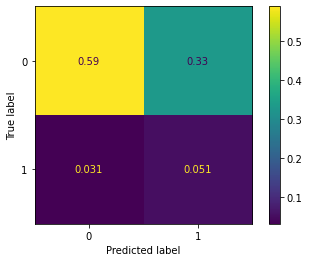

In [57]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_random_r_forest = resultados(random_r_forest.best_estimator_, 'Random Forest (Random Search)')
resultados_modelos.append(scores_random_r_forest)

## RandomForest - Grid Search

In [58]:
def grid_search_r_forest (pipe_final, min_e, max_e, min_d, max_d, scoring = 'roc_auc', cv = 5):
    
    espaco_hiperparametros= {
        'est__n_estimators': range(min_e, max_e),
        'est__max_depth': range(min_d, max_d)
    } 
    grid_search = GridSearchCV(pipe_final, 
                                    param_grid=espaco_hiperparametros, 
                                    scoring=scoring, cv=cv, verbose=2, n_jobs = 5)
    return grid_search

In [59]:
grid_r_forest = grid_search_r_forest(pipe_r_forest,315,316,14,15,scoring = scoring, cv = 5)

In [60]:
grid_r_forest.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('tr_num',
                                                                         Pipeline(steps=[('tr_standard',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'EXT_SOURCE_2']),
                                                                        ('tr_cat',
                                                                         Pipeline(steps=[('tr_dummy',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE',
                                                                          'REGION_RATING_CLIENT_W_CITY',
                                                                          'REG_REGION_NOT_LIVE_REGION'])])),
                                       ('est', RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'est__max_depth': range(14, 15),
                         'est__n_estimators': range(315, 316)},
             scoring='roc_auc', verbose=2)

In [61]:
df_result_r_forest = pd.DataFrame(grid_r_forest.cv_results_)
df_result_r_forest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__max_depth,param_est__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.934865,0.090803,0.628233,0.012541,14,315,"{'est__max_depth': 14, 'est__n_estimators': 315}",0.698633,0.689439,0.691768,0.702146,0.699748,0.696347,0.004881,1


In [62]:
grid_r_forest.best_params_

{'est__max_depth': 14, 'est__n_estimators': 315}

O roc auc score (treino) do modelo Random Forest (Grid Search) foi: 0.82
O roc auc score (teste) do modelo Random Forest (Grid Search) foi: 0.64

              precision    recall  f1-score   support

           0       0.95      0.64      0.76     45060
           1       0.14      0.64      0.22      3980

    accuracy                           0.64     49040
   macro avg       0.54      0.64      0.49     49040
weighted avg       0.89      0.64      0.72     49040



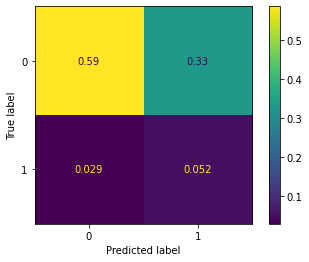

In [63]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_grid_r_forest = resultados(grid_r_forest.best_estimator_, 'Random Forest (Grid Search)')
resultados_modelos.append(scores_grid_r_forest)

# XGBoost

## XGBoost - Random Search

In [64]:
pipe_xgboost = model_type('XGboost')

In [65]:
def random_search_xgboost (pipe_final,n_iter,learning_rate,alpha,colsample_bytree,n_estimators, scoring = 'roc_auc', cv = 5):
    
    espaco_hiper = {
    'est__learning_rate': learning_rate,
    'est__alpha': alpha,
    'est__colsample_bytree': colsample_bytree,
    'est__n_estimators': n_estimators
    	}
    random_search = RandomizedSearchCV (pipe_final, 
                                    param_distributions=espaco_hiper, 
                                    scoring=scoring, cv=cv, verbose=2, n_iter=n_iter, n_jobs = 5)
    return random_search


In [66]:
random_search_xgboost_ = random_search_xgboost(pipe_xgboost,20,np.arange(0.01, 0.15,0.01), np.arange(0.003,0.007,0.001),np.arange(0.2, 0.8, 0.1),np.arange(60,100))

In [67]:
random_search_xgboost_.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_standard',
                                                                                                StandardScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT',
                                                                                'AMT_GOODS_PRICE',
                                                                                'DAYS_BIRTH',
                                                                                'DAYS_ID_PUBLISH',
                                                                                'EXT_SOURCE_2']),
                                                                              ('tr_cat',
                                                                               Pipeline(steps=[('tr_dummy',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['NAME_...
                   param_distributions={'est__alpha': array([0.003, 0.004, 0.005, 0.006]),
                                        'est__colsample_bytree': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'est__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14]),
                                        'est__n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   scoring='roc_auc', verbose=2)

In [68]:
df_result_g_xgboost = pd.DataFrame(random_search_xgboost_.cv_results_)
df_result_g_xgboost 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_estimators,param_est__learning_rate,param_est__colsample_bytree,param_est__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.735059,0.068445,0.063210,0.001001,97,0.08,0.2,0.003,"{'est__n_estimators': 97, 'est__learning_rate'...",0.702022,0.694459,0.692334,0.707708,0.702997,0.699904,0.005690,3
1,2.432854,0.035135,0.063408,0.003931,97,0.11,0.5,0.003,"{'est__n_estimators': 97, 'est__learning_rate'...",0.701113,0.691643,0.690341,0.706957,0.700957,0.698202,0.006285,15
2,2.713200,0.059262,0.066787,0.002109,98,0.14,0.6,0.005,"{'est__n_estimators': 98, 'est__learning_rate'...",0.702163,0.693050,0.689488,0.704874,0.698748,0.697665,0.005684,18
3,1.880837,0.065350,0.063877,0.000790,72,0.14,0.5,0.004,"{'est__n_estimators': 72, 'est__learning_rate'...",0.702376,0.693613,0.688456,0.705061,0.700367,0.697975,0.006082,16
4,2.078660,0.023080,0.062128,0.001701,70,0.01,0.6,0.006,"{'est__n_estimators': 70, 'est__learning_rate'...",0.697297,0.686303,0.689413,0.699415,0.696164,0.693718,0.004995,20
5,2.843771,0.065320,0.064374,0.001407,95,0.11,0.7,0.005,"{'est__n_estimators': 95, 'est__learning_rate'...",0.703518,0.692001,0.691018,0.706924,0.701751,0.699042,0.006379,9
6,1.488159,0.049953,0.063373,0.002834,71,0.06,0.3,0.006,"{'est__n_estimators': 71, 'est__learning_rate'...",0.702681,0.693939,0.694043,0.707333,0.704409,0.700481,0.005504,2
7,1.199045,0.041830,0.061914,0.002881,66,0.13,0.2,0.003,"{'est__n_estimators': 66, 'est__learning_rate'...",0.700415,0.694316,0.690508,0.706692,0.699210,0.698228,0.005519,14
8,1.858232,0.045624,0.060960,0.002072,69,0.05,0.5,0.006,"{'est__n_estimators': 69, 'est__learning_rate'...",0.702071,0.692520,0.692435,0.707178,0.702959,0.699433,0.005935,8
9,2.646076,0.054431,0.063301,0.001767,83,0.05,0.7,0.006,"{'est__n_estimators': 83, 'est__learning_rate'...",0.703339,0.692500,0.694099,0.706237,0.701398,0.699514,0.005327,7


In [69]:
random_search_xgboost_.best_params_

{'est__n_estimators': 96,
 'est__learning_rate': 0.060000000000000005,
 'est__colsample_bytree': 0.30000000000000004,
 'est__alpha': 0.006}

O roc auc score (treino) do modelo XGBoost (Random Search) foi: 0.68
O roc auc score (teste) do modelo XGBoost (Random Search) foi: 0.64

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     45060
           1       0.14      0.63      0.23      3980

    accuracy                           0.65     49040
   macro avg       0.54      0.64      0.50     49040
weighted avg       0.89      0.65      0.73     49040



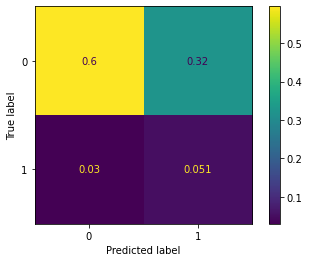

In [70]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_random_search_xgboost = resultados(random_search_xgboost_.best_estimator_, 'XGBoost (Random Search)')
resultados_modelos.append(scores_random_search_xgboost)

## XGBoost - Grid Search

In [71]:
def grid_search_xgboost (pipe_final,learning_rate,alpha,colsample_bytree,n_estimators, scoring = 'roc_auc', cv = 5):
    
    espaco_hiper = {
    'est__learning_rate': learning_rate,
    'est__alpha': alpha,
    'est__colsample_bytree': colsample_bytree,
    'est__n_estimators': n_estimators
    	}
    grid_search = GridSearchCV (estimator=pipe_final,
                                param_grid=espaco_hiper,
                                scoring=scoring,
                                cv=cv,
                                verbose=3,
                                n_jobs=5)
    return grid_search


In [72]:
grid_search_xgboost_ = grid_search_xgboost(pipe_xgboost,[0.05, 0.1, 0.15], [0.003,0.005,0.007],[0.2, 0.5, 0.8],[60, 80, 100])

In [73]:
grid_search_xgboost_.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('tr_num',
                                                                         Pipeline(steps=[('tr_standard',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'EXT_SOURCE_2']),
                                                                        ('tr_cat',
                                                                         Pipeline(steps=[('tr_dummy',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['NAME_CONTRA...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=5,
             param_grid={'est__alpha': [0.003, 0.005, 0.007],
                         'est__colsample_bytree': [0.2, 0.5, 0.8],
                         'est__learning_rate': [0.05, 0.1, 0.15],
                         'est__n_estimators': [60, 80, 100]},
             scoring='roc_auc', verbose=3)

In [74]:
df_result_g_xgboost = pd.DataFrame(grid_search_xgboost_.cv_results_)
df_result_g_xgboost 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__alpha,param_est__colsample_bytree,param_est__learning_rate,param_est__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.023517,0.024174,0.056712,0.001199,0.003,0.2,0.05,60,"{'est__alpha': 0.003, 'est__colsample_bytree':...",0.697401,0.691560,0.690134,0.706223,0.699140,0.696892,0.005770,72
1,1.359348,0.035345,0.057651,0.002198,0.003,0.2,0.05,80,"{'est__alpha': 0.003, 'est__colsample_bytree':...",0.698331,0.692593,0.690999,0.707542,0.700182,0.697929,0.005902,52
2,1.631428,0.028301,0.061698,0.001501,0.003,0.2,0.05,100,"{'est__alpha': 0.003, 'est__colsample_bytree':...",0.699938,0.693072,0.692686,0.708221,0.701746,0.699132,0.005803,32
3,1.059076,0.029792,0.057121,0.001103,0.003,0.2,0.1,60,"{'est__alpha': 0.003, 'est__colsample_bytree':...",0.699568,0.692191,0.691897,0.706176,0.699812,0.697929,0.005358,53
4,1.323598,0.020498,0.057804,0.002975,0.003,0.2,0.1,80,"{'est__alpha': 0.003, 'est__colsample_bytree':...",0.700626,0.694227,0.692938,0.706864,0.701594,0.699250,0.005107,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2.755557,0.076358,0.065681,0.001898,0.007,0.8,0.1,80,"{'est__alpha': 0.007, 'est__colsample_bytree':...",0.702960,0.693232,0.691697,0.708273,0.700769,0.699386,0.006175,23
77,3.523862,0.211148,0.068622,0.001866,0.007,0.8,0.1,100,"{'est__alpha': 0.007, 'est__colsample_bytree':...",0.702367,0.692565,0.691062,0.708528,0.700403,0.698985,0.006458,37
78,2.150103,0.124305,0.061746,0.001376,0.007,0.8,0.15,60,"{'est__alpha': 0.007, 'est__colsample_bytree':...",0.700839,0.691220,0.689557,0.708106,0.700374,0.698019,0.006828,50
79,2.765421,0.155898,0.065626,0.001152,0.007,0.8,0.15,80,"{'est__alpha': 0.007, 'est__colsample_bytree':...",0.699053,0.690449,0.688998,0.706061,0.698912,0.696694,0.006268,75


In [75]:
grid_search_xgboost_.best_params_

{'est__alpha': 0.003,
 'est__colsample_bytree': 0.5,
 'est__learning_rate': 0.05,
 'est__n_estimators': 100}

O roc auc score (treino) do modelo XGBoost (Grid Search) foi: 0.68
O roc auc score (teste) do modelo XGBoost (Grid Search) foi: 0.64

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     45060
           1       0.14      0.64      0.23      3980

    accuracy                           0.65     49040
   macro avg       0.55      0.64      0.50     49040
weighted avg       0.89      0.65      0.73     49040



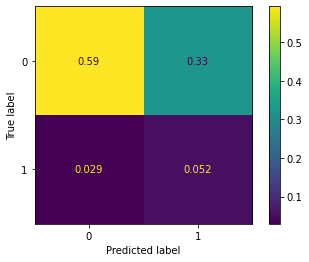

In [76]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_grid_search_xgboost = resultados(grid_search_xgboost_.best_estimator_, 'XGBoost (Grid Search)')
resultados_modelos.append(scores_grid_search_xgboost)

# Resultados

In [77]:
df_resultados = pd.DataFrame(resultados_modelos).round(4)



In [78]:
df_resultados_melt = df_resultados.iloc[[0,1,3,4,5,7],:].melt(id_vars='modelo')

In [79]:
df_resultados



,modelo,roc_auc,f1_score_1,precision_1,recall_1,f1_score_0,precision_0,recall_0
0,Logit,0.6327,0.2210,0.1348,0.6123,0.7741,0.9502,0.6530
1,KNN classifier (Random Search),0.6286,0.2170,0.1317,0.6156,0.7658,0.9497,0.6415
2,KNN classifier (Grid Search),0.6282,0.2168,0.1316,0.6148,0.7658,0.9496,0.6417
3,Decision Tree Gini,0.5583,0.1702,0.1003,0.5623,0.6960,0.9348,0.5543
4,Decision Tree Entropy,0.5545,0.1680,0.0988,0.5613,0.6904,0.9339,0.5476
5,Random Forest (Random Search),0.6318,0.2189,0.1327,0.6234,0.7652,0.9506,0.6403
6,Random Forest (Grid Search),0.6390,0.2231,0.1352,0.6392,0.7647,0.9525,0.6387
7,XGBoost (Random Search),0.6411,0.2258,0.1374,0.6337,0.7716,0.9525,0.6485
8,XGBoost (Grid Search),0.6436,0.2270,0.1379,0.6410,0.7702,0.9532,0.6462


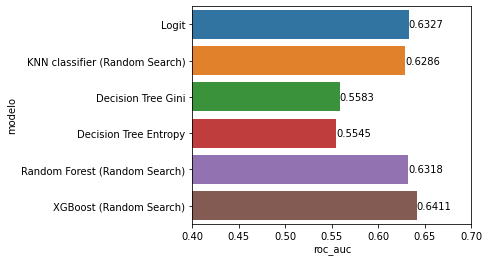

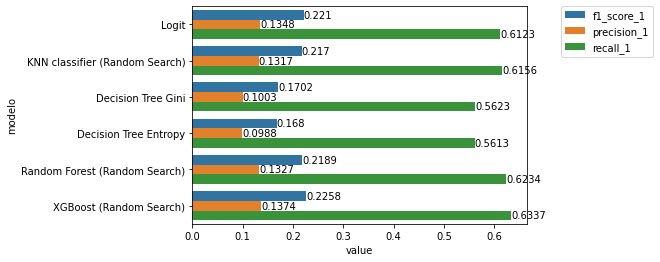

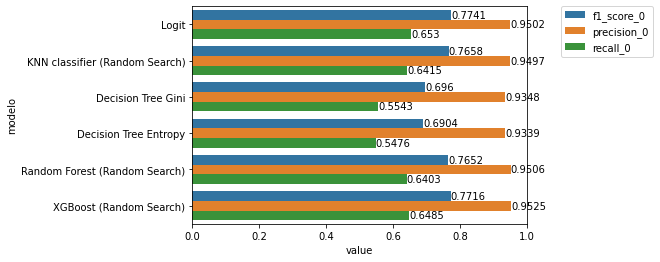

In [80]:

fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(data = df_resultados.iloc[[0,1,3,4,5,7],[0,1]], x='roc_auc', y='modelo', orient='h', ax=ax)
ax.set_xlim(0.4,0.7)
ax.bar_label(ax.containers[0])
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data = df_resultados_melt[df_resultados_melt['variable'].isin(['f1_score_1', 'precision_1', 'recall_1',])], x='value', y='modelo', hue='variable', orient='h', ax=ax)
#ax.set_xlim(0.4,0.7)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left', borderaxespad=0)
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data = df_resultados_melt[df_resultados_melt['variable'].isin(['f1_score_0', 'precision_0', 'recall_0',])], x='value', y='modelo', hue='variable', orient='h', ax=ax)
#ax.set_xlim(0.4,0.7)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.legend(bbox_to_anchor=(1.10, 1), loc='upper left', borderaxespad=0)
plt.show()

# Adicionando novas features 

In [81]:
df_sel.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_ID_PUBLISH                0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
EXT_SOURCE_2                   0
dtype: int64

In [82]:
novas_features = pd.read_csv('novas_features.csv').drop(columns='index')

In [83]:
df_nfeat_sel = df_sel.merge(novas_features, on='SK_ID_CURR', how='left')
df_nfeat_sel.fillna(0, inplace=True)

In [84]:
X = df_nfeat_sel.drop(columns = ['TARGET', 'SK_ID_CURR'], axis = 1)
y = df_nfeat_sel['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify = y)

In [85]:
df_train_balanced = downsampling(pd.concat([X_train, y_train], axis=1), 'TARGET')
X_balanced = df_train_balanced.drop(columns = ['TARGET'], axis = 1)
y_balanced = df_train_balanced['TARGET']

In [86]:
features_num = df_nfeat_sel.select_dtypes(include=np.number).columns.tolist()
features_num.remove("TARGET")
features_num.remove("SK_ID_CURR")
features_cat = df_nfeat_sel.select_dtypes(exclude=np.number).columns.tolist()

# MODELO FINAL (XGboost)

In [87]:
pipe_xgboost = model_type('XGboost')

In [88]:
random_search_xgboost_final = random_search_xgboost(pipe_xgboost,10,np.arange(0.01, 0.15,0.01), np.arange(0.003,0.007,0.001),np.arange(0.2, 0.8, 0.1),np.arange(60,100))


In [89]:
random_search_xgboost_final.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pre_processor',
                                              ColumnTransformer(transformers=[('tr_num',
                                                                               Pipeline(steps=[('tr_standard',
                                                                                                StandardScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT_x',
                                                                                'AMT_GOODS_PRICE',
                                                                                'DAYS_BIRTH',
                                                                                'DAYS_ID_PUBLISH',
                                                                                'REGION_RATING_CLIENT_W_CITY',
                                                                                'REG_REGION_NOT_LIVE_REGION',
                                                                                'EXT_SOURCE_2',
                                                                                'Cash '
                                                                                'loans',
                                                                                'Co...
                   param_distributions={'est__alpha': array([0.003, 0.004, 0.005, 0.006]),
                                        'est__colsample_bytree': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'est__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14]),
                                        'est__n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
       94, 95, 96, 97, 98, 99])},
                   scoring='roc_auc', verbose=2)

In [90]:
df_result_r_xgboost = pd.DataFrame(random_search_xgboost_final.cv_results_)
df_result_r_xgboost

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__n_estimators,param_est__learning_rate,param_est__colsample_bytree,param_est__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.169176,0.177155,0.076165,0.003030,71,0.07,0.4,0.006,"{'est__n_estimators': 71, 'est__learning_rate'...",0.724261,0.708073,0.714944,0.723224,0.720980,0.718296,0.006047,1
1,5.115147,0.448211,0.075707,0.002167,79,0.08,0.8,0.006,"{'est__n_estimators': 79, 'est__learning_rate'...",0.725286,0.708393,0.709543,0.723821,0.721178,0.717644,0.007215,3
2,2.146123,0.207332,0.071597,0.002946,65,0.13,0.2,0.004,"{'est__n_estimators': 65, 'est__learning_rate'...",0.722754,0.707151,0.710702,0.724232,0.720098,0.716987,0.006807,5
3,3.027056,0.186818,0.071775,0.002925,62,0.07,0.5,0.005,"{'est__n_estimators': 62, 'est__learning_rate'...",0.723057,0.705377,0.713260,0.720852,0.722037,0.716917,0.006722,6
4,2.988573,0.293342,0.072752,0.003372,79,0.06,0.3,0.003,"{'est__n_estimators': 79, 'est__learning_rate'...",0.724376,0.706956,0.711775,0.721259,0.721676,0.717209,0.006669,4
5,3.330420,0.309427,0.073821,0.003325,62,0.13,0.6,0.003,"{'est__n_estimators': 62, 'est__learning_rate'...",0.724502,0.708670,0.708592,0.724429,0.723360,0.717911,0.007587,2
6,3.265881,0.198314,0.074727,0.001891,71,0.01,0.5,0.003,"{'est__n_estimators': 71, 'est__learning_rate'...",0.711702,0.698416,0.706761,0.710358,0.711292,0.707706,0.004961,10
7,3.284800,0.173287,0.073249,0.004094,70,0.02,0.5,0.004,"{'est__n_estimators': 70, 'est__learning_rate'...",0.714395,0.701233,0.708711,0.714272,0.715196,0.710762,0.005295,9
8,3.660855,0.358820,0.075344,0.003454,81,0.02,0.4,0.006,"{'est__n_estimators': 81, 'est__learning_rate'...",0.717578,0.703026,0.710698,0.717121,0.718700,0.713425,0.005905,8
9,5.412420,0.520049,0.067608,0.012202,98,0.14,0.8,0.003,"{'est__n_estimators': 98, 'est__learning_rate'...",0.720516,0.707131,0.706335,0.726001,0.718395,0.715676,0.007716,7


In [91]:
random_search_xgboost_final.best_params_

{'est__n_estimators': 71,
 'est__learning_rate': 0.06999999999999999,
 'est__colsample_bytree': 0.4000000000000001,
 'est__alpha': 0.006}

O roc auc score (treino) do modelo XGBoost (Random Search) foi: 0.71
O roc auc score (teste) do modelo XGBoost (Random Search) foi: 0.66

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     45060
           1       0.15      0.66      0.24      3980

    accuracy                           0.66     49040
   macro avg       0.55      0.66      0.51     49040
weighted avg       0.89      0.66      0.74     49040



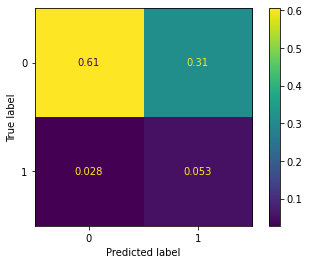

In [92]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_random_search_xgboost_final = resultados(random_search_xgboost_final.best_estimator_, 'XGBoost (Random Search)')

In [93]:
grid_search_xgboost_final = grid_search_xgboost(pipe_xgboost,[0.09, 0.11, 0.13], [0.002,0.004,0.006],[0.5, 0.6, 0.7],[60, 65, 70])

{'est__n_estimators': 65,
 'est__learning_rate': 0.11,
 'est__colsample_bytree': 0.6000000000000001,
 'est__alpha': 0.004}

In [94]:
grid_search_xgboost_final.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processor',
                                        ColumnTransformer(transformers=[('tr_num',
                                                                         Pipeline(steps=[('tr_standard',
                                                                                          StandardScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT_x',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'REGION_RATING_CLIENT_W_CITY',
                                                                          'REG_REGION_NOT_LIVE_REGION',
                                                                          'EXT_SOURCE_2',
                                                                          'Cash '
                                                                          'loans',
                                                                          'Consumer...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=5,
             param_grid={'est__alpha': [0.002, 0.004, 0.006],
                         'est__colsample_bytree': [0.5, 0.6, 0.7],
                         'est__learning_rate': [0.09, 0.11, 0.13],
                         'est__n_estimators': [60, 65, 70]},
             scoring='roc_auc', verbose=3)

In [95]:
df_result_g_xgboost = pd.DataFrame(grid_search_xgboost_final.cv_results_)
df_result_g_xgboost

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_est__alpha,param_est__colsample_bytree,param_est__learning_rate,param_est__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.897208,0.117669,0.068579,0.004254,0.002,0.5,0.09,60,"{'est__alpha': 0.002, 'est__colsample_bytree':...",0.724924,0.709337,0.712147,0.722120,0.720973,0.717900,0.006050,43
1,3.277489,0.332149,0.071822,0.003356,0.002,0.5,0.09,65,"{'est__alpha': 0.002, 'est__colsample_bytree':...",0.725431,0.709082,0.712057,0.722215,0.721220,0.718001,0.006296,39
2,3.601092,0.226525,0.081355,0.010067,0.002,0.5,0.09,70,"{'est__alpha': 0.002, 'est__colsample_bytree':...",0.725900,0.709679,0.712078,0.722661,0.722250,0.718514,0.006406,13
3,2.804232,0.051888,0.069213,0.001013,0.002,0.5,0.11,60,"{'est__alpha': 0.002, 'est__colsample_bytree':...",0.722897,0.709223,0.712139,0.723182,0.724427,0.718374,0.006369,21
4,2.929984,0.114151,0.074433,0.003778,0.002,0.5,0.11,65,"{'est__alpha': 0.002, 'est__colsample_bytree':...",0.723084,0.709305,0.711965,0.723482,0.724689,0.718505,0.006502,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3.612198,0.105307,0.073831,0.004704,0.006,0.7,0.11,65,"{'est__alpha': 0.006, 'est__colsample_bytree':...",0.724766,0.710303,0.710780,0.724775,0.722000,0.718525,0.006598,12
77,3.804933,0.124174,0.076041,0.002367,0.006,0.7,0.11,70,"{'est__alpha': 0.006, 'est__colsample_bytree':...",0.724850,0.710339,0.710447,0.724707,0.721907,0.718450,0.006662,17
78,3.304190,0.170474,0.072338,0.002994,0.006,0.7,0.13,60,"{'est__alpha': 0.006, 'est__colsample_bytree':...",0.725966,0.704538,0.710161,0.722606,0.720779,0.716810,0.008099,79
79,3.471645,0.112310,0.073462,0.001429,0.006,0.7,0.13,65,"{'est__alpha': 0.006, 'est__colsample_bytree':...",0.726568,0.704571,0.710106,0.722989,0.720803,0.717008,0.008293,73


In [96]:
grid_search_xgboost_final.best_params_

{'est__alpha': 0.004,
 'est__colsample_bytree': 0.6,
 'est__learning_rate': 0.11,
 'est__n_estimators': 70}

O roc auc score (treino) do modelo XGBoost (Grid Search) foi: 0.73
O roc auc score (teste) do modelo XGBoost (Grid Search) foi: 0.66

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     45060
           1       0.15      0.66      0.24      3980

    accuracy                           0.66     49040
   macro avg       0.55      0.66      0.51     49040
weighted avg       0.89      0.66      0.74     49040



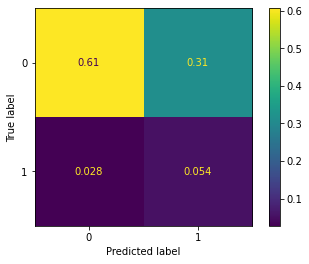

In [97]:
proba, predict_treino, predict_teste, roc_treino, roc_teste, scores_grid_search_xgboost_final = resultados(grid_search_xgboost_final.best_estimator_, 'XGBoost (Grid Search)')

In [98]:
predict_teste

array([1, 1, 0, ..., 0, 0, 0])

In [99]:
def precision_recall_widgets(cutoff = 0.5):
    
    y_pred = np.where(proba >= cutoff, 1, 0)
    y_pred
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    df = pd.DataFrame(report).round(2)
    
    plt.figure(figsize=(10,5))
    plt.table(cellText=df.values, colLabels=df.columns, loc='center')

widgets.interact(precision_recall_widgets, cutoff=(0.1, 0.9, 0.01))

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=0.9, min=0.1, step=0.01), Output()), _d…

<function __main__.precision_recall_widgets(cutoff=0.5)>